This is a general guide to using the app with a couple of examples to read in a file, either manually using nploadtxt and the THz_data class or in one step using the new create data which as some generic readers

In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import phoeniks as pk

Data can be created manually by passing numpy variables and additional information to the Phoeniks Data class, you'd need to do this it if a reader function for your file type has not be implemented

In [ ]:
ref_file = "examples/05_Multiple_Measurements/td_reference_mean.txt"
ref = np.loadtxt(ref_file)
ref, ref.shape
time = 1e-12 * ref[:, 0]

sam_file = "examples/05_Multiple_Measurements/td_sample_mean.txt"
sam = np.loadtxt(sam_file)
sam, sam.shape

dark_file = "examples/05_Multiple_Measurements/td_dark_mean.txt"
dark = np.loadtxt(dark_file)
dark, dark.shape

fd_sample_std_real, fd_sample_std_imag = np.loadtxt("examples/05_Multiple_Measurements/fd_sample_std.txt")
fd_reference_std_real, fd_reference_std_imag = np.loadtxt("examples/05_Multiple_Measurements/fd_reference_std.txt")
fd_dark_std_real, fd_dark_std_imag = np.loadtxt("examples/05_Multiple_Measurements/fd_dark_std.txt")

data = pk.thz_data.Data(time = time, 
                        td_reference = ref[:, 1], 
                        td_sample = sam[:, 1],
                        thickness = 450e-6,
                        td_dark = dark[:, 1],
                        fd_reference_std = fd_reference_std_real + 1j * fd_reference_std_imag,
                        fd_sample_std = fd_sample_std_real + 1j * fd_sample_std_imag,
                        fd_dark_std = fd_dark_std_real + 1j * fd_dark_std_imag)


Or Could be created by passing file names to the Phoeniks reader functions

In [2]:
ref_file = "examples/05_Multiple_Measurements/td_reference_mean.txt"
sample_file = "examples/05_Multiple_Measurements/td_sample_mean.txt"
dark_file = "examples/05_Multiple_Measurements/td_dark_mean.txt"
fd_sample_std = "examples/05_Multiple_Measurements/fd_sample_std.txt"
fd_reference_std = "examples/05_Multiple_Measurements/fd_reference_std.txt"
fd_dark_std = "examples/05_Multiple_Measurements/fd_dark_std.txt"



data = pk.reader.create_data(ref_file, sample_file, dark_file, fd_reference_std=fd_reference_std, fd_sample_std=fd_sample_std, fd_dark_std=fd_dark_std, reader='XY', sample_thickness=450e-6, sample_name=None)

In [5]:

data.td_reference = data.linear_offset(data.td_reference)
data.td_sample = data.linear_offset(data.td_sample)
data.td_dark = data.linear_offset(data.td_dark)
data.offset_time_to_reference_peak()
data.window_traces(start=100, end=1500, windows='tukey', alpha=0.1)
data.pad_zeros(zero_padding=4096)
data.plot_type = "trans"

In [6]:
# run iteractive interface
data.generate_layout()
data.app.run_server(jupyter_mode='tab')


Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

You can then used the save functionality to save a file in a range of formats, the first exports the data object as a pickle file 

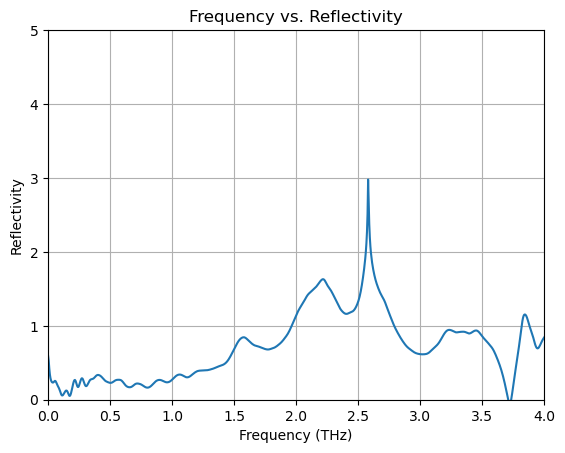

In [15]:
x = data.frequency/1E12
y = 2 - np.log10(data.amplitude_ratio*100)
plt.plot(x,y)

plt.xlim(0, 4)  # Replace 0 and 12 with your desired range
plt.ylim(0, 5)
# Rest of the code remains the same
plt.xlabel("Frequency (THz)")
plt.ylabel("Reflectivity")
plt.title("Frequency vs. Reflectivity")
plt.grid()
plt.show()

In [14]:
print(y.shape)

AttributeError: 'tuple' object has no attribute 'shape'

In [6]:
pk.save.save_data_to_pickle(data, ".\data.pkl")


Instance of <phoeniks.thz_data.Data object at 0x00000220F75C5950> saved to .\data.pkl using dill.


You can then reimport this pickle file and carry on processing

In [8]:
data2 = pk.save.read_pickle_to_data('.\data.pkl')

Instance of .\data.pkl read in using dill.


Finally you can then save the frequency data to a text file

In [11]:
pk.save.save_to_file(data, 'frequency_output.csv', Type ='frequency')